<br>
<br>

### Proyecto: Predicción de enfermedades: Soporte para la toma de decisiones

##### ![1) Definición del objetivo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Definici%C3%B3n%20del%20objetivo.jpg?raw=true)

Se busca obtener un modelo computacional que permita la predicción de enfermedades, dicho modelo se convertirá en un soporte para la toma de decisiones médicas cuya aplicación estará enfocada principalmente en estudiantes de medicina recién graduados que estén atravesando por su primer año de residencia.

##### ![2) Contexto comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Contexto%20comercial.jpg?raw=true)

El resultado final del proyecto tiene por objetivo:<br>
1- Minimizar inconvenientes legales causados por negligencias médicas proveniente de la inexperiencia de los recién graduados.<br>
2- Proveer a los internos de un soporte a sus inferencias médicas ante una emergencia o la ausencia de un titular.<br>

##### ![3) Problema comercial:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Problema%20comercial.jpg?raw=true)

¿Es posible desarrollar un modelo que, en función de ciertos inputs, nos permita predecir una enfermedad?

##### ![Librerías utilizadas:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Librerias%20utilizadas.jpg?raw=true)

In [27]:
# Manipulación y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder


# División de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split


# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

##### ![4) Data Acquisition:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Acquisition.jpg?raw=true)

El dataset utilizado es el resultado de la recopilación de datos provenientes de las historias clínicas de pacientes que ya fueron diagnosticados por esta institución y cuyos casos fueron analizados por la junta médica de este hospital.

In [28]:
# Defino el origen de los datos.
url_dataset="https://raw.githubusercontent.com/chetincho/ds_Prediccion_de_enfermedades/refs/heads/main/dataset/ds_entrenamiento.csv"

# Carga del dataframe
df = pd.read_csv(url_dataset)

# Seteamos el índice del dataframe para que comience en 1
df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

# Seteamos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

##### ![5) Exploratory Data Analysis (EDA):](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Exploratory%20Data%20Analysis.jpg?raw=true)

🗒️ ¿Cuál es la cantidad de filas y columnas que componen el dataframe?

In [29]:
filas, columnas = df.shape
print(f"✅ Total de Filas = {filas}")
print(f"✅ Total de Columnas = {columnas}")

✅ Total de Filas = 4920
✅ Total de Columnas = 134


🗒️ ¿Cuáles son las columnas o atributos que lo componen?

In [30]:
# Utilizo el método .tolist() para convertir las columnas en una lista
print(f"Este dataframe está compuesto por las siguientes columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(f"🧬 {columna}")

Este dataframe está compuesto por las siguientes columnas:
🧬 itching
🧬 skin_rash
🧬 nodal_skin_eruptions
🧬 continuous_sneezing
🧬 shivering
🧬 chills
🧬 joint_pain
🧬 stomach_pain
🧬 acidity
🧬 ulcers_on_tongue
🧬 muscle_wasting
🧬 vomiting
🧬 burning_micturition
🧬 spotting_ urination
🧬 fatigue
🧬 weight_gain
🧬 anxiety
🧬 cold_hands_and_feets
🧬 mood_swings
🧬 weight_loss
🧬 restlessness
🧬 lethargy
🧬 patches_in_throat
🧬 irregular_sugar_level
🧬 cough
🧬 high_fever
🧬 sunken_eyes
🧬 breathlessness
🧬 sweating
🧬 dehydration
🧬 indigestion
🧬 headache
🧬 yellowish_skin
🧬 dark_urine
🧬 nausea
🧬 loss_of_appetite
🧬 pain_behind_the_eyes
🧬 back_pain
🧬 constipation
🧬 abdominal_pain
🧬 diarrhoea
🧬 mild_fever
🧬 yellow_urine
🧬 yellowing_of_eyes
🧬 acute_liver_failure
🧬 fluid_overload
🧬 swelling_of_stomach
🧬 swelled_lymph_nodes
🧬 malaise
🧬 blurred_and_distorted_vision
🧬 phlegm
🧬 throat_irritation
🧬 redness_of_eyes
🧬 sinus_pressure
🧬 runny_nose
🧬 congestion
🧬 chest_pain
🧬 weakness_in_limbs
🧬 fast_heart_rate
🧬 pain_during_bow

🗒️ ¿Hay valores nulos?

In [31]:
print(f"✅ Total de valores nulos detectados: {sum(df.isnull().sum())} valores")

✅ Total de valores nulos detectados: 4920 valores


⚠️ Atención: El origen de los valores nulos corresponden a la columna llamada "Unnamed", se procede a su eliminación.

In [32]:
df = df.drop('Unnamed: 133', axis=1)

🗒️ ¿Cuáles son los tipos de dato de cada columna?

In [33]:
print(f"Tipo de Dato por Columna:")
for columna, tipo in df.dtypes.items():
    print(f"🔍 {columna}: {tipo}")

Tipo de Dato por Columna:
🔍 itching: int64
🔍 skin_rash: int64
🔍 nodal_skin_eruptions: int64
🔍 continuous_sneezing: int64
🔍 shivering: int64
🔍 chills: int64
🔍 joint_pain: int64
🔍 stomach_pain: int64
🔍 acidity: int64
🔍 ulcers_on_tongue: int64
🔍 muscle_wasting: int64
🔍 vomiting: int64
🔍 burning_micturition: int64
🔍 spotting_ urination: int64
🔍 fatigue: int64
🔍 weight_gain: int64
🔍 anxiety: int64
🔍 cold_hands_and_feets: int64
🔍 mood_swings: int64
🔍 weight_loss: int64
🔍 restlessness: int64
🔍 lethargy: int64
🔍 patches_in_throat: int64
🔍 irregular_sugar_level: int64
🔍 cough: int64
🔍 high_fever: int64
🔍 sunken_eyes: int64
🔍 breathlessness: int64
🔍 sweating: int64
🔍 dehydration: int64
🔍 indigestion: int64
🔍 headache: int64
🔍 yellowish_skin: int64
🔍 dark_urine: int64
🔍 nausea: int64
🔍 loss_of_appetite: int64
🔍 pain_behind_the_eyes: int64
🔍 back_pain: int64
🔍 constipation: int64
🔍 abdominal_pain: int64
🔍 diarrhoea: int64
🔍 mild_fever: int64
🔍 yellow_urine: int64
🔍 yellowing_of_eyes: int64
🔍 acute

In [34]:
print(f"✅ Resumen de los tipos de datos que componen el dataframe:")
resumen_tipos_datos = df.dtypes.value_counts()
print(resumen_tipos_datos)

✅ Resumen de los tipos de datos que componen el dataframe:
int64     132
object      1
Name: count, dtype: int64


🗒️ Veamos una pequeña muestra del dataframe, exploramos las primeras y últimas filas.

In [35]:
print("Esta es una muestra de los datos contenidos en el dataframe:")
print("🗂️ PRIMEROS 10 REGISTROS")
print("=========================")
df.head(10)

Esta es una muestra de los datos contenidos en el dataframe:
🗂️ PRIMEROS 10 REGISTROS


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [36]:
print("🗂️ ÚLTIMOS 10 REGISTROS")
print("========================")
df.tail(10)

🗂️ ÚLTIMOS 10 REGISTROS


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hypothyroidism
4912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hyperthyroidism
4913,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Hypoglycemia
4914,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Osteoarthristis
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Arthritis
4916,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4917,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

💡 Si el contenido de la celda es igual a 1 ➡️ el síntoma formo parte del diagnóstico.<br>
💡 Si el contenido de la celda es igual a 0 ➡️ el síntoma NO formo parte del diagnóstico.<br>

🗒️ ¿Cuántas historias clínicas fueron relevadas por cada tipo de enfermedad diagnosticada?

In [37]:
frecuencia_valores = df['prognosis'].value_counts()
print(f"\n✅ Frecuencia de valores en la columna: {'prognosis'}")
print("-------------------------------------------------------")

n=1
for enfermedad,frecuencia in frecuencia_valores.items():
    print(f"{n} {enfermedad} -> {frecuencia}")
    n=n+1


✅ Frecuencia de valores en la columna: prognosis
-------------------------------------------------------
1 Fungal infection -> 120
2 Hepatitis C -> 120
3 Hepatitis E -> 120
4 Alcoholic hepatitis -> 120
5 Tuberculosis -> 120
6 Common Cold -> 120
7 Pneumonia -> 120
8 Dimorphic hemmorhoids(piles) -> 120
9 Heart attack -> 120
10 Varicose veins -> 120
11 Hypothyroidism -> 120
12 Hyperthyroidism -> 120
13 Hypoglycemia -> 120
14 Osteoarthristis -> 120
15 Arthritis -> 120
16 (vertigo) Paroymsal  Positional Vertigo -> 120
17 Acne -> 120
18 Urinary tract infection -> 120
19 Psoriasis -> 120
20 Hepatitis D -> 120
21 Hepatitis B -> 120
22 Allergy -> 120
23 hepatitis A -> 120
24 GERD -> 120
25 Chronic cholestasis -> 120
26 Drug Reaction -> 120
27 Peptic ulcer diseae -> 120
28 AIDS -> 120
29 Diabetes  -> 120
30 Gastroenteritis -> 120
31 Bronchial Asthma -> 120
32 Hypertension  -> 120
33 Migraine -> 120
34 Cervical spondylosis -> 120
35 Paralysis (brain hemorrhage) -> 120
36 Jaundice -> 120
37 Malar

💡 Se observa que en total el dataset contiene 41 enfermedades posibles de diagnóstico de las cuales se relevaron equitativamente 120 historias clínicas.<br>

🗒️ ¿Cuáles son los síntomas que más se repiten?

In [38]:
# Identificamos las columnas pertenecientes a los síntomas
columnas_binarias = df.columns[:-1]  # Filtro la última columna, la cual corresponde al síntoma

# Calculamos la frecuencia del valor 1 (SI) para cada síntoma
frecuencia_unos = df[columnas_binarias].sum()

# Calculamos el número total de filas (para obtener la proporción)
total_filas = len(df)

# Calculamos el porcentaje de 1s (SI)
porcentaje_unos = (frecuencia_unos / total_filas) * 100


print("✅ Total de veces que el síntoma forma parte del dignóstico")
print("")

for columna, frecuencia in frecuencia_unos.items():
    porcentaje = porcentaje_unos[columna]
    print(f"El {porcentaje:.2f}% de las veces el síntoma << {columna} >> formo parte del diagnóstico")


✅ Total de veces que el síntoma forma parte del dignóstico

El 13.78% de las veces el síntoma << itching >> formo parte del diagnóstico
El 15.98% de las veces el síntoma << skin_rash >> formo parte del diagnóstico
El 2.20% de las veces el síntoma << nodal_skin_eruptions >> formo parte del diagnóstico
El 4.51% de las veces el síntoma << continuous_sneezing >> formo parte del diagnóstico
El 2.20% de las veces el síntoma << shivering >> formo parte del diagnóstico
El 16.22% de las veces el síntoma << chills >> formo parte del diagnóstico
El 13.90% de las veces el síntoma << joint_pain >> formo parte del diagnóstico
El 4.51% de las veces el síntoma << stomach_pain >> formo parte del diagnóstico
El 4.51% de las veces el síntoma << acidity >> formo parte del diagnóstico
El 2.20% de las veces el síntoma << ulcers_on_tongue >> formo parte del diagnóstico
El 2.20% de las veces el síntoma << muscle_wasting >> formo parte del diagnóstico
El 38.90% de las veces el síntoma << vomiting >> formo part

💡 Hay 7 síntomas con alto grado de participación en los diagnósticos:<br>
- fatigue esta presente en el 39,27% de los diagnósticos.<br>
- vomiting esta presente en el 38,90% de los diagnósticos.<br>
- high_fever esta presente en el 27,68% de los diagnósticos.<br>
- loss_of_appetite esta presente en el 23,41% de los diagnósticos.<br>
- nausea esta presente en el 23,29% de los diagnósticos.<br>
- headache esta presente en el 23,05% de los diagnósticos.<br>
- abdominal_pain esta presente en el 20,98% de los diagnósticos.<br>
<br>

⚠️ Porcentajes altos de participación de un síntoma provoca que éste no sea determinante en el diagnostico, ej: fatigue y vomiting está presente en casi el 40% de las historias clínicas. Si el profesional de la salud no tiene en cuenta el resto de los síntomas puede cometer errores de diagnóstico.

🗒️ Matriz de correlación

C:\Users\marti\AppData\Local\Temp\ipykernel_4668\2206059722.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


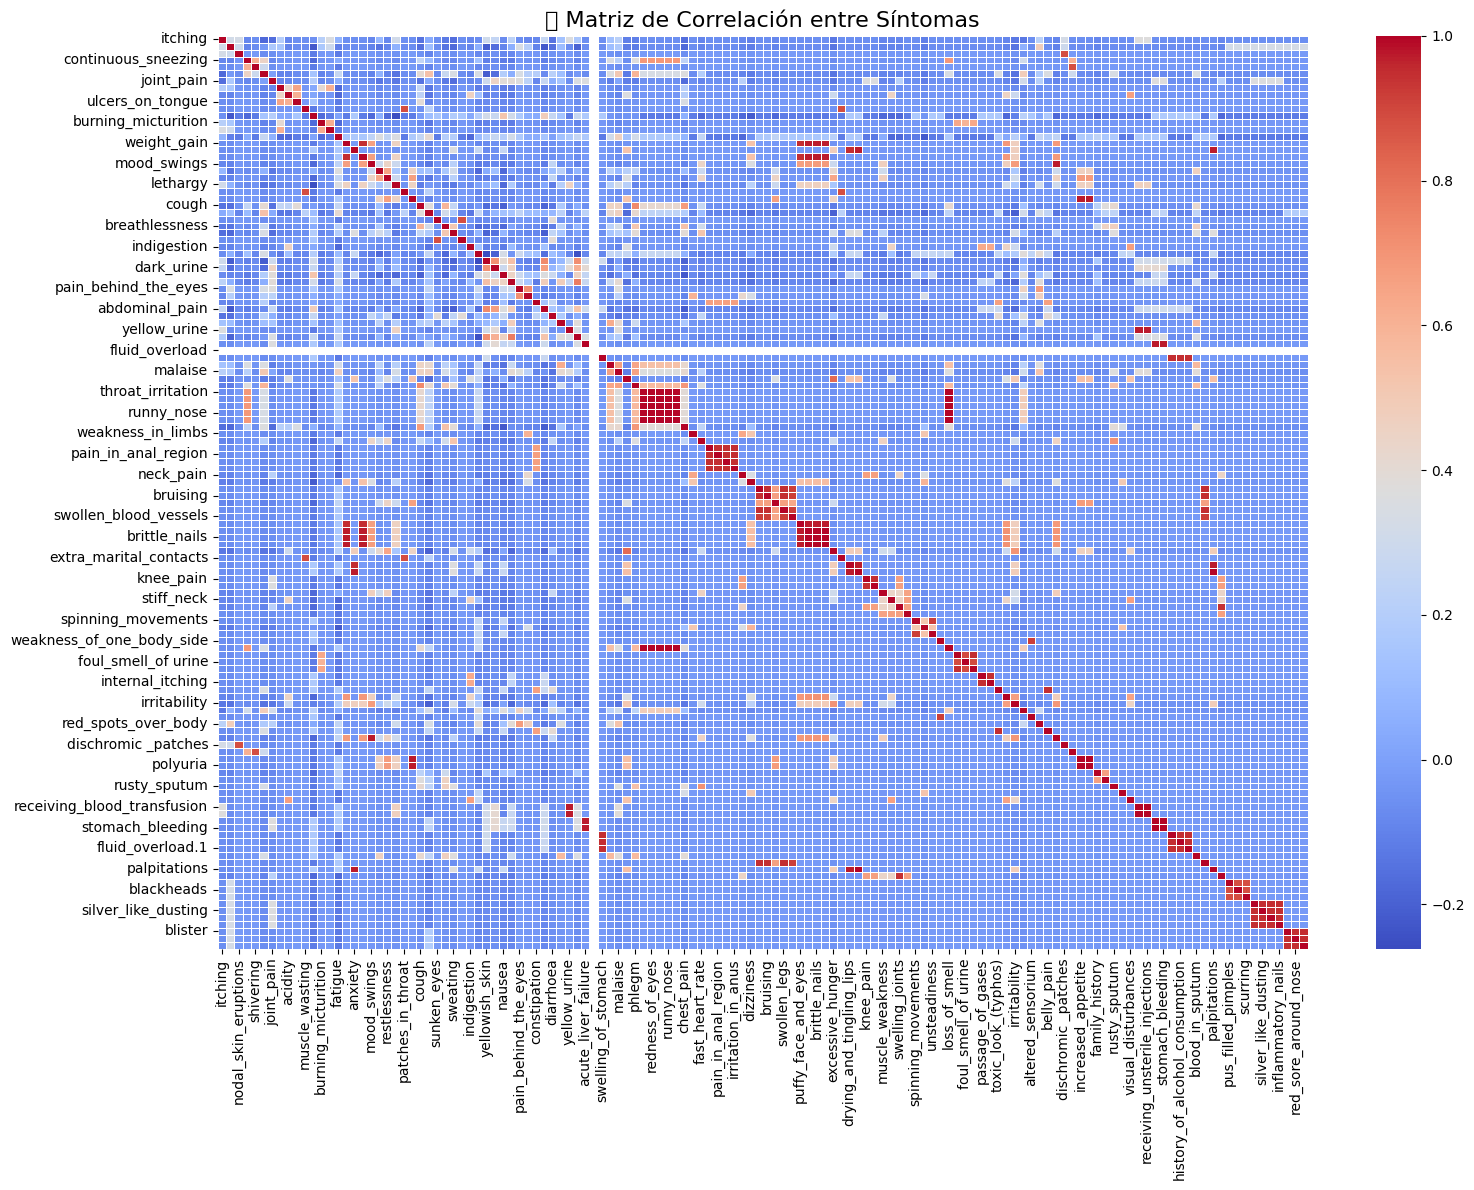

In [39]:
# Separo las características (features) de la variable objetivo
X = df.drop('prognosis', axis=1)

# Calculo la matriz de correlación entre todas las variables
matriz_correlacion = X.corr()

# Muestro la matriz de correlación con un mapa de calor
plt.figure(figsize=(16, 12))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, cmap='coolwarm', linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Síntomas", fontsize=16)
plt.tight_layout()
plt.show()

🗒️ Dado que desde la gráfica se dificulta observar cuáles son las variables con alto índice de correlación se procede a su listado.

In [40]:
# Busco y almaceno todos los pares con correlación > 0.9 (positiva o negativa)
valores_correlacionados_altos = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i + 1, len(matriz_correlacion.columns)):
        valor = matriz_correlacion.iloc[i, j]
        if abs(valor) > 0.9:
            valores_correlacionados_altos.append((matriz_correlacion.index[i], matriz_correlacion.columns[j], valor))

# Ordeno los pares por el valor absoluto de su correlación (de mayor a menor)
valores_correlacionados_altos_ordenado = sorted(valores_correlacionados_altos, key=lambda x: abs(x[2]), reverse=True)

# Muestro los pares encontrados
print("🔗 Pares de síntomas con correlación > 0.9:\n")
for var1, var2, valor in valores_correlacionados_altos_ordenado:
    print(f"{var1} ↔ {var2}: correlación = {valor:.2f}")

🔗 Pares de síntomas con correlación > 0.9:

throat_irritation ↔ redness_of_eyes: correlación = 1.00
throat_irritation ↔ sinus_pressure: correlación = 1.00
throat_irritation ↔ runny_nose: correlación = 1.00
throat_irritation ↔ congestion: correlación = 1.00
throat_irritation ↔ loss_of_smell: correlación = 1.00
redness_of_eyes ↔ sinus_pressure: correlación = 1.00
redness_of_eyes ↔ runny_nose: correlación = 1.00
redness_of_eyes ↔ congestion: correlación = 1.00
redness_of_eyes ↔ loss_of_smell: correlación = 1.00
sinus_pressure ↔ runny_nose: correlación = 1.00
sinus_pressure ↔ congestion: correlación = 1.00
sinus_pressure ↔ loss_of_smell: correlación = 1.00
runny_nose ↔ congestion: correlación = 1.00
runny_nose ↔ loss_of_smell: correlación = 1.00
congestion ↔ loss_of_smell: correlación = 1.00
enlarged_thyroid ↔ brittle_nails: correlación = 1.00
enlarged_thyroid ↔ swollen_extremeties: correlación = 1.00
brittle_nails ↔ swollen_extremeties: correlación = 1.00
slurred_speech ↔ palpitations: co

Se observa gran cantidad de variables con alta correlación, por el momento, y debido a la cantidad de síntomas no se toman decisiones para reducir dimensionalidad.

##### ![6) Data Wrangling / Data Munging:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Data%20Wrangling%20Munging.jpg?raw=true)

🗒️ Codificación de variables categóricas.<br>
Se confirma que no hay variables categóricas, además de la variable target.

🗒️ Normalización o escalado.<br>
No es necesario aplicar normalización o escalado. Todas las variables ya están en la misma escala (0 o 1). Todas las variables (síntomas) son binarias, es decir, solo toman valores 0 o 1.<br>

🗒️ Codificamos columna objetivo (prognosis) usando LabelEncoder. Esto lo hacemos para que el modelo pueda procesar dicha columna.<br>
Este método convierte cada clase en un número entero único.<br>
<br>
Se crea una nueva columna prognosis_encoded que contiene valores numéricos. Cada número representa una enfermedad distinta.<br>

In [41]:
# Creamos una instancia del codificador
label_encoder = LabelEncoder()

# Aplicamos el codificador sobre la columna "prognosis"
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

# Mostramos la codificación
print("🔍 Mapeo de enfermedades (prognosis):")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i} → {class_label}")

🔍 Mapeo de enfermedades (prognosis):
0 → (vertigo) Paroymsal  Positional Vertigo
1 → AIDS
2 → Acne
3 → Alcoholic hepatitis
4 → Allergy
5 → Arthritis
6 → Bronchial Asthma
7 → Cervical spondylosis
8 → Chicken pox
9 → Chronic cholestasis
10 → Common Cold
11 → Dengue
12 → Diabetes 
13 → Dimorphic hemmorhoids(piles)
14 → Drug Reaction
15 → Fungal infection
16 → GERD
17 → Gastroenteritis
18 → Heart attack
19 → Hepatitis B
20 → Hepatitis C
21 → Hepatitis D
22 → Hepatitis E
23 → Hypertension 
24 → Hyperthyroidism
25 → Hypoglycemia
26 → Hypothyroidism
27 → Impetigo
28 → Jaundice
29 → Malaria
30 → Migraine
31 → Osteoarthristis
32 → Paralysis (brain hemorrhage)
33 → Peptic ulcer diseae
34 → Pneumonia
35 → Psoriasis
36 → Tuberculosis
37 → Typhoid
38 → Urinary tract infection
39 → Varicose veins
40 → hepatitis A


In [42]:
df.head(30)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,prognosis_encoded
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
7,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

##### ![Primeras conclusiones:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Primeras%20conclusiones.jpg?raw=true)

- Todo indica que se trata de un problema de clasificación multiclase con 41 enfermedades como clases posibles. <br>
- Nuestra variable objetivo será "prognosis". <br>
- Se confirma que no hay columnas categóricas (además de la target). <br>

##### ![Selección y entrenamiento del modelo:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Selecci%C3%B3n%20y%20entrenamiento%20del%20modelo%20fundamentos.jpg?raw=true)

Procedemos a separar en X (features) e Y (target):<br>
- X: todas las columnas de síntomas (features)<br>
- y: la columna codificada prognosis_encoded (target)<br>

In [43]:
# -----------------------------------------------
# 🎯 SEPARACIÓN DE FEATURES (X) Y TARGET (y)
# -----------------------------------------------

# Paso 1: Definir las variables independientes (X)
# Excluimos la columna objetivo codificada y cualquier otra que no queramos usar como feature
X = df.drop(columns=['prognosis', 'prognosis_encoded'])  # usamos solo los síntomas

# Paso 2: Definir la variable dependiente (y)
# Usamos la versión codificada de la columna objetivo
y = df['prognosis_encoded']

# Paso 3: Verificar dimensiones
print(f"📐 Dimensión de X (features): {X.shape}")
print(f"🎯 Dimensión de y (target): {y.shape}")

# X: contiene todos los síntomas (sin la columna de diagnóstico).
# y: contiene el diagnóstico codificado numéricamente (prognosis_encoded).
# Imprime las dimensiones de ambos para confirmar que todo está en orden.

📐 Dimensión de X (features): (4920, 132)
🎯 Dimensión de y (target): (4920,)


Luego, procedemos a dividir el dataset en #conjunto_de_entrenamiento y #conjunto_de_pruebas.<br>

In [44]:
# Paso 2: Dividir los datos en entrenamiento y prueba
# Usamos 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                  # Features y target
    test_size=0.2,         # 20% para test
    random_state=42,       # Semilla para reproducibilidad
    stratify=y             # Mantiene la proporción de clases en y
)

# Paso 3: Mostrar el tamaño de cada subconjunto
print(f"🔧 X_train: {X_train.shape}")
print(f"🧪 X_test:  {X_test.shape}")
print(f"🎯 y_train: {y_train.shape}")
print(f"🎯 y_test:  {y_test.shape}")

🔧 X_train: (3936, 132)
🧪 X_test:  (984, 132)
🎯 y_train: (3936,)
🎯 y_test:  (984,)


Procedemos a evaluar distintos Modelos de Machine Learning <br>

Comentarios: Tipo de problema de Clasificación multiclase (porque queremos predecir una entre varias clases posibles). Esto implica que vamos a construir modelos de clasificación que puedan identificar a cuál de esas 41 enfermedades pertenece cada muestra, en base a los síntomas.<br>

🤖 1. Random Forest Classifier<br>

In [45]:
# -----------------------------------------------
# 🌲 RANDOM FOREST CLASSIFIER
# -----------------------------------------------

# Paso 1:Creamos una instancia del modelo
# - n_estimators: número de árboles en el bosque
# - random_state: semilla para reproducibilidad
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)

# Paso 2: Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Paso 3: Hacemos predicciones sobre el conjunto de prueba
rf_preds = rf_model.predict(X_test)

# Paso 4: Evaluamos el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🎯 [Random Forest] Accuracy:", accuracy_score(y_test, rf_preds))
print("📋 [Random Forest] Classification Report:")
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))

🎯 [Random Forest] Accuracy: 1.0
📋 [Random Forest] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common 

🗒️ Conclusión Random Forest Classifier:
- Habiendo logrado una accuracy de 1.0 (o 100%) esto nos indica que el modelo predijo correctamente TODAS las muestras del conjunto de prueba.
- El modelo clasificó correctamente todas las enfermedades del test.
- No hubo falsos positivos ni falsos negativos.
- Todas las clases tienen el mismo número de muestras (24)

🤖 2. K-Nearest Neighbors (KNN)<br>

In [46]:
# -----------------------------------------------
# 👥 K-NEAREST NEIGHBORS (KNN)
# -----------------------------------------------

# Paso 1: Importamos el modelo desde sklearn
from sklearn.neighbors import KNeighborsClassifier

# Paso 2: Crear una instancia del modelo
# n_neighbors: número de vecinos a considerar
knn_model = KNeighborsClassifier(n_neighbors=5)

# Paso 3: Entrenamos el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Paso 4: Hacemos las predicciones sobre el conjunto de prueba
knn_preds = knn_model.predict(X_test)

# Paso 5: Evaluamos el rendimiento del modelo
print("🎯 [KNN] Accuracy:", accuracy_score(y_test, knn_preds))
print("📋 [KNN] Classification Report:")
print(classification_report(y_test, knn_preds, target_names=label_encoder.classes_))

🎯 [KNN] Accuracy: 1.0
📋 [KNN] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00     

🗒️ Conclusión K-Nearest Neighbors (KNN):
- Al igual que con el modelo Random Forest Classifier se alcanza una accuracy de 1.0 (o 100%)

🤖 3. Support Vector Machine (SVM)<br>

In [47]:
# -----------------------------------------------
# 💠 SUPPORT VECTOR MACHINE (SVM)
# -----------------------------------------------

# Paso 1: Importamos el modelo desde sklearn
from sklearn.svm import SVC

# Paso 2: Creamos una instancia del modelo
# kernel='linear': usaremos un kernel lineal para clasificación
svm_model = SVC(kernel='linear', probability=True)

# Paso 3: Entrenamos el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Paso 4: Hacemos predicciones sobre el conjunto de prueba
svm_preds = svm_model.predict(X_test)

# Paso 5: Evaluamos el rendimiento del modelo
print("🎯 [SVM] Accuracy:", accuracy_score(y_test, svm_preds))
print("📋 [SVM] Classification Report:")
print(classification_report(y_test, svm_preds, target_names=label_encoder.classes_))

🎯 [SVM] Accuracy: 1.0
📋 [SVM] Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00     

##### ![Conclusiones finales:](https://github.com/chetincho/ds_Prediccion_de_enfermedades/blob/main/img/Conclusiones%20finales.jpg?raw=true)

Los 3 modelos mostraron un 100% de precisión, lo cual indica que el problema está muy bien definido y probablemente los síntomas determinan claramente la enfermedad.<br>
- Cada combinación de síntomas apunta a un diagnóstico único.<br>
- No hay ambigüedad o ruido en los datos.<br>


🧠 Interpretación<br>
Los tres modelos clasificaron correctamente todos los casos del set de prueba.<br>
Esto indica que el problema es altamente separable y que los síntomas determinan muy bien el diagnóstico.<br>
Es posible que el dataset tenga patrones muy claros o incluso síntomas únicos por enfermedad.<br>

<br>
<br>
<br>
<br>
<br>
<br>